In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import seaborn as sns

In [2]:
data = pd.read_csv('log2.csv')
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [3]:
data['Action'].unique()

array(['allow', 'drop', 'deny', 'reset-both'], dtype=object)

In [4]:
#label_encoder = preprocessing.LabelEncoder() 
  
#data['Action']= label_encoder.fit_transform(data['Action']) 

In [5]:
data['Action'].nunique()

4

In [6]:
data.tail(20)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
65512,56985,53,45052,53,711,87,624,2,31,1,1,allow
65513,50269,445,0,0,66,66,0,1,0,1,0,drop
65514,50270,445,0,0,66,66,0,1,0,1,0,drop
65515,50268,445,0,0,66,66,0,1,0,1,0,drop
65516,56103,21247,0,0,66,66,0,1,0,1,0,deny
65517,54874,445,0,0,70,70,0,1,0,1,0,drop
65518,54013,37965,0,0,66,66,0,1,0,1,0,deny
65519,49784,445,0,0,70,70,0,1,0,1,0,drop
65520,49783,445,0,0,70,70,0,1,0,1,0,drop
65521,42995,26467,0,0,62,62,0,1,0,1,0,deny


In [7]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [8]:
#Splitting the data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [9]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train)
#print(X_test)

In [10]:
#Training the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier (n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
data.sample()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
3517,51051,443,1978,443,7712,2203,5509,24,516,14,10,allow


In [12]:
prediction = classifier.predict

In [13]:
#Making a prediction: 11 features eg: 57222	53	54587	53	177	94	83	2	30	1	1
# 54871	445	0	0	70	70	0	1	0	1	0	2

print(classifier.predict(sc.transform([[49380, 443, 0, 0, 70, 70, 0, 1, 0, 1, 0, ]])))


['drop']


In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['allow' 'allow']
 ['drop' 'drop']
 ['allow' 'allow']
 ...
 ['allow' 'allow']
 ['deny' 'deny']
 ['allow' 'allow']]


[[7511   11    0    0]
 [   4 2978    7    0]
 [   0    1 2588    0]
 [   1    6    0    0]]


C:\Users\35383\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\35383\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\35383\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7522
        deny       0.99      1.00      1.00      2989
        drop       1.00      1.00      1.00      2589
  reset-both       0.00      0.00      0.00         7

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107

0.9977111467154955


<Axes: >

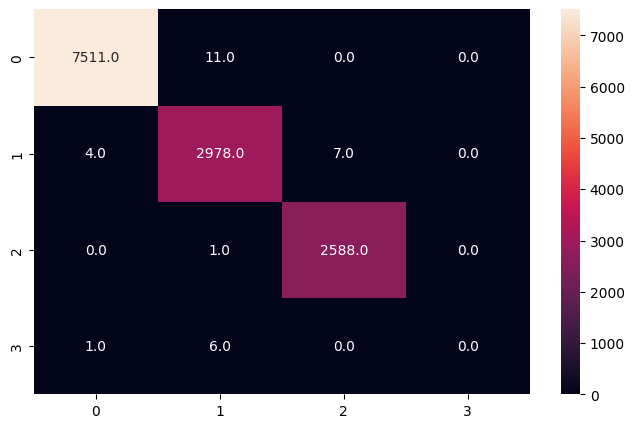

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
mat_conf = confusion_matrix(y_test, y_pred)
print(mat_conf)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plt.figure( figsize = (8,5))
sns.heatmap(mat_conf, annot=True, fmt=".1f")

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Initialize k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)  # Use 5 folds, shuffle data, set random state for reproducibility

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=k_fold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())


Cross-validation scores: [0.99397269 0.99351492 0.99374332 0.99420113 0.99236991]
Mean CV accuracy: 0.9935603923759798
Standard deviation of CV accuracy: 0.0006377017629815959
